### File information

File: Exercise_5.2_Charts.ipynb

Name: Amie Davis

Date: 11/1/2020

Course: DSC640 - Data Presentation & Visualization

Assignment Number: 5.2

Purpose: Build heat map, spatial chart, and countour chart

Usage: Python 3.7.6

Developed using Jupter Notebook 6.0.3


References: https://matplotlib.org/, 
https://jupyter-gmaps.readthedocs.io/en/latest/api.html

## Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Load Data

In [2]:
# Load Address data into dataframe
geo_data = "ex5-2/costcos-geocoded.csv" 
geo_df = pd.read_csv(geo_data)

# Show data
geo_df.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [3]:
# Load Basketball data into dataframe
bball_data = "ex5-2/ppg2008.csv"
bball_df = pd.read_csv(bball_data)

# Sort dataframe
bball_df.sort_values(['Name  '], inplace = True)

# Change the row indexes 
bball_df.index = bball_df['Name  ']
bball_df.drop(['Name  '], axis=1, inplace = True)

# Show data
bball_df.head()

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Al Harrington,73,34.9,20.1,7.3,16.6,0.439,3.2,4.0,0.793,2.3,6.4,0.364,1.4,4.9,6.2,1.4,1.2,0.3,2.2,3.1
Al Jefferson,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,0.0,0.1,0.000,3.4,7.5,11.0,1.6,0.8,1.7,1.8,2.8
Allen Iverson,57,36.7,17.5,6.1,14.6,0.417,4.8,6.1,0.781,0.5,1.7,0.283,0.5,2.5,3.0,5.0,1.5,0.1,2.6,1.5
Amare Stoudemire,53,36.8,21.4,7.6,14.1,0.539,6.1,7.3,0.835,0.1,0.1,0.429,2.2,5.9,8.1,2.0,0.9,1.1,2.8,3.1
Andre Iguodala,82,39.8,18.8,6.6,14.0,0.473,4.6,6.4,0.724,1.0,3.2,0.307,1.1,4.6,5.7,5.3,1.6,0.4,2.7,1.9


## Heat Map w/ matplotlib

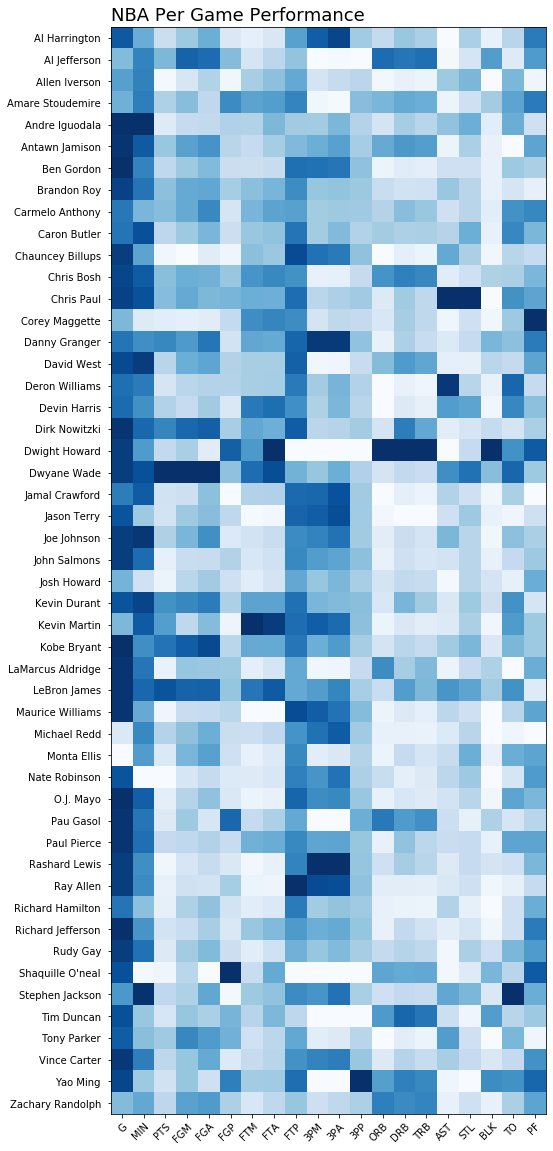

In [4]:
from sklearn import preprocessing

# Set figure size
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

# Normalize Data
# Necessary to scale each column separately
x = bball_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
bball_norm = pd.DataFrame(x_scaled)

# Convert dataframeto matrix
bball_matrix = bball_norm.to_numpy()

# Build heat map
im = ax.imshow(bball_matrix, cmap=cm.Blues)

# Label rows and columns
ax.set_xticklabels(bball_df.columns)
ax.set_yticklabels(bball_df.index.values)

# Show all labels
ax.set_xticks(np.arange(len(bball_df.columns)))
ax.set_yticks(np.arange(len(bball_df.index.values)))

# Rotate labels on x-axis
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set plot parameters
plt.title('NBA Per Game Performance', loc='left', fontsize=18)

# Save plot to file
plt.savefig('Py_heatmap.png', bbox_inches='tight')

# Show Plot
plt.show()

## Spatial Chart w/ googlemaps

In [11]:
# Install gmaps first
#conda install -c conda-forge gmaps
#jupyter nbextension enable --py --sys-prefix gmaps
import gmaps
import ipywidgets as widgets

# To use Google maps to display geodetic information, need the API key passed
# Make sure to Enable Maps Javascript API in Google Developer

# Use imported data for geodetic data
geo_df = geo_df[['Latitude', 'Longitude']]

# Get map from Google
fig = gmaps.figure(layout={'width': '600px'}, center=(39, -116), zoom_level=3)

# Plot data on map
geo_layer = gmaps.symbol_layer(geo_df, fill_color=(54, 159, 247), stroke_color=(54, 159, 247), scale=2)
fig.add_layer(geo_layer)

# Show title
# Figures are a type of Jupyter widget
title = widgets.HTML('<h3>Addresses</h3>')

# Show Plot
widgets.VBox([
    title,
    fig
])


## Contour Plot

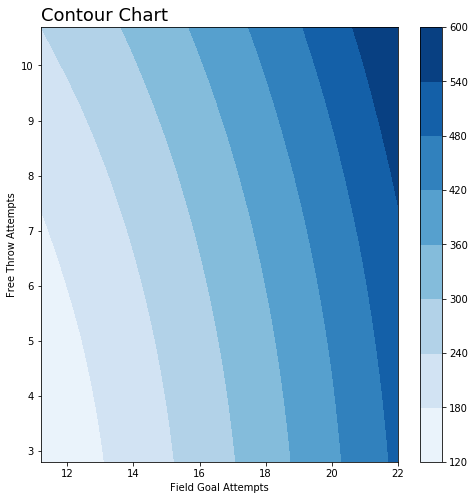

In [6]:
# Set figure size
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Convert to sorted arrays then mesh
X_unique = np.sort(bball_df.FGA.unique())
Y_unique = np.sort(bball_df.FTA.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

# Z is function of X & Y
Z = X**2 + Y**2

# Set Colormap
cmap = plt.get_cmap('Blues')

# Contour Map
cf = ax.contourf(X, Y, Z, cmap=cmap)
fig.colorbar(cf, ax=ax)

# Set plot parameters
plt.title('Contour Chart', loc='left', fontsize=18)
plt.xlabel('Field Goal Attempts')
plt.ylabel('Free Throw Attempts')
#plt.xticks([], [])
#plt.yticks([], [])

# Save plot to file
plt.savefig('Py_contour.png', bbox_inches='tight')

# Show Plot
plt.show()